### Урок 7. Многомерный статистический анализ. Линейная регрессия

In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

**1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.**

In [2]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

**с интерсептом:**

In [3]:
n = len(X)
n

10

In [4]:
b = (n * (np.sum(X*y)) - (np.sum(X) * np.sum(y))) / (n * (np.sum(X**2)) - (np.sum(X)**2))
b

2.6205388824027653

In [5]:
a = np.mean(y) - b * np.mean(X)
a

444.17735732435955

In [6]:
y1_hat = a + b * X
y1_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

**без интерсепта:**

In [7]:
X2 = X.reshape(10, 1)
y2 = y.reshape(10, 1)

In [8]:
B = np.dot(np.linalg.inv(np.dot(X2.T, X2)),X2.T@y)
B

array([5.88982042])

In [9]:
y2_hat = B * X
y2_hat

array([ 206.1437147 ,  265.04191891, 1119.06587983, 1177.96408403,
        235.59281681,  412.28742941,  318.05030269,  883.47306302,
        706.77845042,  647.88024621])

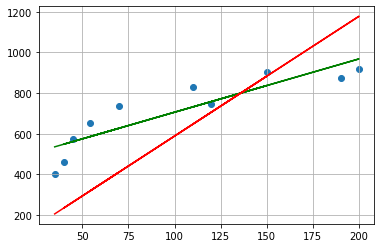

In [11]:
plt.grid()
plt.scatter(X, y)
plt.plot(X, y1_hat, color='green')
plt.plot(X, y2_hat, color='red')
plt.show()

**2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).**

In [12]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = len(X)

In [13]:
def mse_(B1, y=y, X=X, n=n):
    return np.sum((B1*X - y)**2) / n

In [14]:
alpha = 1e-6
B1 = 10
for i in range(1001):
    B1 -= alpha * (2/n) * np.sum((B1*X - y) * X)
    if i % 50 == 0:
        print(f'iteration: {i}, B1 = {B1}, mse = {mse_(B1)}')

iteration: 0, B1 = 9.8867514, mse = 276604.34287384455
iteration: 50, B1 = 6.878417278270489, mse = 69981.0567613131
iteration: 100, B1 = 6.134338965197076, mse = 57340.5519462072
iteration: 150, B1 = 5.950299389277936, mse = 56567.24916418826
iteration: 200, B1 = 5.904779227072703, mse = 56519.94114908718
iteration: 250, B1 = 5.893520316282229, mse = 56517.04700678632
iteration: 300, B1 = 5.890735548696904, mse = 56516.86995307483
iteration: 350, B1 = 5.890046767104388, mse = 56516.859121535286
iteration: 400, B1 = 5.889876404563293, mse = 56516.8584588988
iteration: 450, B1 = 5.88983426726502, mse = 56516.85841836096
iteration: 500, B1 = 5.889823845068368, mse = 56516.85841588101
iteration: 550, B1 = 5.889821267252808, mse = 56516.85841572929
iteration: 600, B1 = 5.88982062965852, mse = 56516.85841572002
iteration: 650, B1 = 5.889820471956595, mse = 56516.85841571945
iteration: 700, B1 = 5.889820432950761, mse = 56516.85841571941
iteration: 750, B1 = 5.889820423303099, mse = 56516.85

**3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?**

Если известна сигма или дисперсия генеральной совокупности, то используется таблица значений функции Лапласа. В противном случае - таблица критических точек распределения Стьюдента.

***4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).**

In [15]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = len(X)

In [16]:
def mse2_(B0, B1, y=y, X=X, n=n):
    return np.sum((B0 + B1*X - y)**2) / n

In [18]:
alpha = 1e-8
B0 = 445
B1 = 3
for i in range(1000001):
    B0_temp = B0
    B0 -= alpha * (2/n) * np.sum((B0_temp + B1*X - y))
    B1 -= alpha * (2/n) * np.sum((B0_temp + B1*X - y) * X)
    if i % 50000 == 0:
        print(f'iteration: {i}, B0 = {B0}, B1 = {B1}, mse = {mse2_(B0, B1)}')

iteration: 0, B0 = 444.999999214, B1 = 2.999893778, mse = 8516.971782351871
iteration: 50000, B0 = 444.996954665133, B1 = 2.6145066832534716, mse = 6470.584597994019
iteration: 100000, B0 = 444.99674679673785, B1 = 2.6145078136134354, mse = 6470.584511571034
iteration: 150000, B0 = 444.99653898398986, B1 = 2.6145093432066617, mse = 6470.584425194086
iteration: 200000, B0 = 444.99633122395994, B1 = 2.6145108724125024, mse = 6470.584338860943
iteration: 250000, B0 = 444.9961235166149, B1 = 2.6145124012303, mse = 6470.584252571587
iteration: 300000, B0 = 444.9959158619493, B1 = 2.614513929660532, mse = 6470.584166325996
iteration: 350000, B0 = 444.99570825995255, B1 = 2.6145154577030274, mse = 6470.584080124148
iteration: 400000, B0 = 444.99550071059946, B1 = 2.6145169853580135, mse = 6470.583993966016
iteration: 450000, B0 = 444.99529321389645, B1 = 2.6145185126255233, mse = 6470.583907851581
iteration: 500000, B0 = 444.99508576980423, B1 = 2.6145200395056465, mse = 6470.583821780815
ite

**Тут не смог подобрать параметры, чтобы получить коэфициенты точно как в задании 1 с интерсептом. Ошибся где-то в формулах или нужно больше итераций? (увеличение количества итераций еще хотя бы на порядок занимает слишком много времени для вычислений - не дождался)**